## inspect the raw data from single molecule model

#### read into the raw data

In [8]:
# data loading 

import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random

In [9]:
# read into the data

def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data

In [10]:
# visualize
def visusalizeIMG(n_slice, test_img, test_msk):
    # n_slice = random.randint(0, test_img.shape[2])
    plt.figure(figsize=(8, 8))

    plt.subplot(121)
    plt.imshow(test_img[n_slice,:,:], cmap='gray')
    plt.title('focal slice')
    plt.subplot(122)
    plt.imshow(test_msk[n_slice,:,:], cmap='gray')
    plt.title('GT slice')
    plt.show()

In [26]:
# Data path

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220715/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

img_list = os.listdir(img_dir)
msk_list = os.listdir(mask_dir)

num_images = len(os.listdir(img_dir))
print(num_images)

301


In [28]:
# inspect the single raw file

i = 0
test_img = readMRC(img_dir + img_list[i])
test_msk = readMRC(mask_dir + msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))

image: (100, 100, 100) 47.08363 -50.804176
GT: (100, 100, 100) 0.4999977 -9.834723


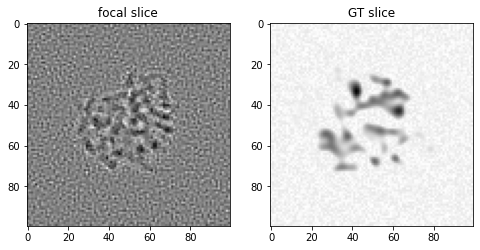

In [29]:
# visualize

# n_slice = random.randint(0, test_img.shape[2])
n_slice = 50

plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.imshow(test_img[n_slice,:,:], cmap='gray')
plt.title('focal slice')
plt.subplot(122)
plt.imshow(test_msk[n_slice,:,:], cmap='gray')
plt.title('GT slice')
plt.show()

#### read into the processed nii file

In [ ]:
import SimpleITK as sitk

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, fixed
import os

image = sitk.ReadImage('./Data_folder_norm/images/val/image0.nii')  # 整理过之后的数据
imageShow = sitk.GetArrayViewFromImage(image)
label = sitk.ReadImage('./Data_folder_norm/labels/val/label0.nii')
labelShow = sitk.GetArrayViewFromImage(label)


In [ ]:
print('image nii:', imageShow.shape, np.max(imageShow), np.min(imageShow))
print('GT nii:', labelShow.shape, np.max(labelShow), np.min(labelShow))

In [ ]:
n_slice = random.randint(0, imageShow.shape[2])

visusalizeIMG(n_slice, imageShow, labelShow) 

#### pre-processing for raw data

In [1]:
# data loading 

import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random

In [2]:
# read into the data

def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data


# Data path

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220715/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

img_list = os.listdir(img_dir)
msk_list = os.listdir(mask_dir)

num_images = len(os.listdir(img_dir))
print(num_images)

301


In [30]:
# inspect the single raw file

i = 0
test_img = readMRC(img_dir + img_list[i])
test_msk = readMRC(mask_dir + msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))
print(test_msk.dtype)


image: (100, 100, 100) 47.08363 -50.804176
GT: (100, 100, 100) 0.4999977 -9.834723
float32


In [6]:
# scale between [0,1] with sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

test_image_standard = scaler.fit_transform(test_img.reshape(-1, test_img.shape[-1])).reshape(test_img.shape)
test_mask_standard = scaler.fit_transform(test_msk.reshape(-1, test_msk.shape[-1])).reshape(test_msk.shape)

print(test_image_standard.shape, test_image_standard.min(), test_image_standard.max()) 
print(test_mask_standard.shape, test_mask_standard.min(), test_mask_standard.max()) 

(100, 100, 100) 0.0 1.0000001
(100, 100, 100) 0.0 1.0000001


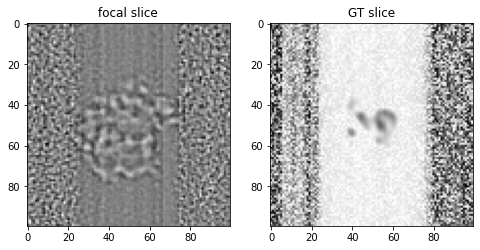

In [15]:
n_slice = random.randint(0, test_img.shape[2])

visusalizeIMG(n_slice, test_image_standard, test_mask_standard)

In [31]:
# manually normalize the data

test_image_manual = np.interp(test_img, (test_img.min(), test_img.max()), (0, 1))
test_mask_manual = np.interp(test_msk, (test_msk.min(), test_msk.max()), (0, 1))

print(test_image_manual.shape, test_image_manual.min(), test_image_manual.max()) 
print(test_mask_manual.shape, test_mask_manual.min(), test_mask_manual.max()) 

(100, 100, 100) 0.0 1.0
(100, 100, 100) 0.0 1.0


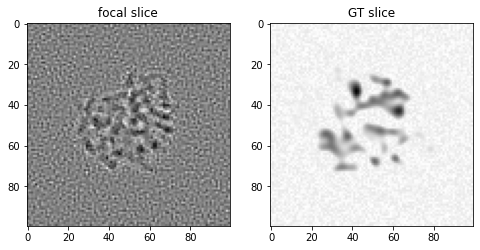

In [32]:
# n_slice = random.randint(0, test_img.shape[2])
n_slice = 50

visusalizeIMG(n_slice, test_image_manual, test_mask_manual)

##### directly read in as uint8

In [17]:
# read in as type uint8

# inspect the single raw file

i = 0
test_img_uint8 = readMRC(img_dir + img_list[i]) #.astype(np.uint8)
test_msk_uint8 = readMRC(mask_dir + msk_list[i]).astype(np.uint8)

print('image:', test_img_uint8.shape, np.max(test_img_uint8), np.min(test_img_uint8))
print('GT:', test_msk_uint8.shape, np.max(test_msk_uint8), np.min(test_msk_uint8))

image: (100, 100, 100) 47.08363 -50.804176
GT: (100, 100, 100) 255 0


In [21]:
print(np.unique(test_msk_uint8))

[  0 247 248 249 250 251 252 253 254 255]


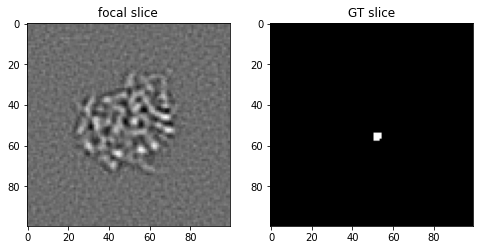

In [20]:
n_slice = random.randint(0, test_img.shape[2])

visusalizeIMG(n_slice, test_img_uint8, test_msk_uint8) 

## raw data pre-processing

In [1]:
import os
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import os
import pandas as pd
import random
import glob

In [2]:
# read into the data
def readMRC(path):
    with mrcfile.open(path, mode='r+', permissive=True) as mrc:
        mrc.header.map = mrcfile.constants.MAP_ID # for synthetic data, need to generate ID
        data = mrc.data
    return data

# visualize
def visusalizeIMG(n_slice, test_img, test_msk):
    # n_slice = random.randint(0, test_img.shape[2])
    plt.figure(figsize=(8, 8))

    plt.subplot(121)
    plt.imshow(test_img[n_slice,:,:], cmap='gray')
    plt.title('focal slice')
    plt.subplot(122)
    plt.imshow(test_msk[n_slice,:,:], cmap='gray')
    plt.title('GT slice')
    plt.show()

In [3]:
# Data path

DATA_PATH = 'H:/My Drive/rawData/MDC_HZDR/simulation_20220715/'

img_dir = DATA_PATH + 'focal/'
mask_dir = DATA_PATH + 'GT/'

# img_list = os.listdir(img_dir)
# msk_list = os.listdir(mask_dir)

img_list = sorted(glob.glob(img_dir + '/*focal.mrc'))
msk_list = sorted(glob.glob(mask_dir + '/*gt.mrc'))

num_images = len(img_list)
print(num_images)

300


image: (100, 100, 100) 47.08363 -50.804176
GT: (100, 100, 100) 0.4999977 -9.834723


D:\INSTALL\Anaconda\envs\EM\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


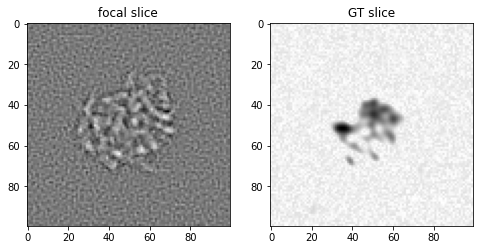

In [4]:
# inspect the single raw file

i = 0
test_img = readMRC(img_list[i])
test_msk = readMRC(msk_list[i])

print('image:', test_img.shape, np.max(test_img), np.min(test_img))
print('GT:', test_msk.shape, np.max(test_msk), np.min(test_msk))

n_slice = random.randint(0, test_img.shape[2])
visusalizeIMG(n_slice, test_img, test_msk)

(100, 100, 100) 0.0 1.0
(100, 100, 100) 0.0 1.0


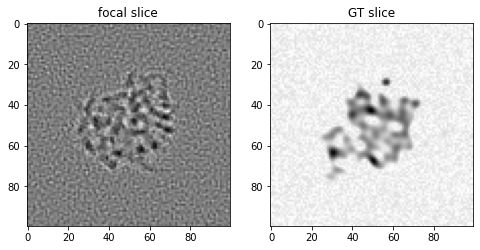

In [10]:
# rescale the image into [0,1]

test_image_manual = np.interp(test_img, (test_img.min(), test_img.max()), (0, 1))
test_mask_manual = np.interp(test_msk, (test_msk.min(), test_msk.max()), (0, 1))

print(test_image_manual.shape, test_image_manual.min(), test_image_manual.max()) 
print(test_mask_manual.shape, test_mask_manual.min(), test_mask_manual.max()) 

n_slice = random.randint(0, test_img.shape[2])
visusalizeIMG(n_slice, test_image_manual, test_mask_manual)

In [14]:
print((np.unique(test_mask_manual)).shape)

(991062,)


80


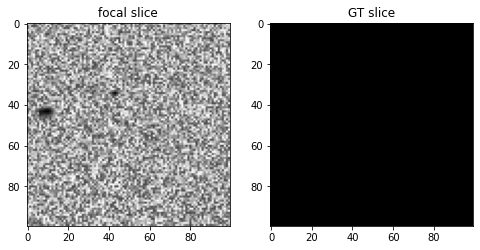

In [77]:
# binary the mask

test_mask_bi = (test_mask_manual < 0.825).astype(int)

# n_slice = random.randint(0, test_img.shape[2])
n_slice = 80
print(n_slice)
visusalizeIMG(n_slice, test_mask_manual, test_mask_bi)

In [109]:
# crop the data to enhance SNR

print('label:', np.unique(test_mask_bi))

val, counts = np.unique(test_mask_bi, return_counts=True)
ratio = 1 - (counts[0]/counts.sum())  # how many 1 elements inside
print('before cut useful information:', np.round(ratio, 3))

test_mask_bi_cut = test_mask_bi[18:82, 18:82, 18:82]
test_image_cut = test_image_manual[18:82, 18:82, 18:82]

val, counts = np.unique(test_mask_bi_cut, return_counts=True)
ratio = 1 - (counts[0]/counts.sum())  # how many 1 elements inside
print('after cut information:', np.round(ratio, 3))

label: [0 1]
before cut useful information: 0.028
after cut information: 0.109


16


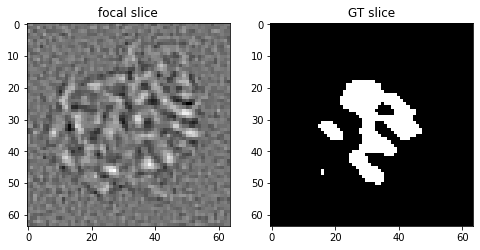

In [110]:
# visualize

n_slice = random.randint(0, test_image_cut.shape[2])
# n_slice = 80
print(n_slice)
visusalizeIMG(n_slice, test_image_cut, test_mask_bi_cut)

In [112]:
# change image into correct channel; assign the category for masks
from tensorflow.keras.utils import to_categorical

combined_x = np.stack([test_image_cut], axis = 3)  # axis为3则增加一个维度
print(combined_x.shape)

print('before category:', test_mask_bi_cut.shape)
test_mask_bi_cut = to_categorical(test_mask_bi_cut, num_classes=2) 
print('after category:', test_mask_bi_cut.shape, np.unique(test_mask_bi_cut))

(64, 64, 64, 1)
before category: (64, 64, 64)
after category: (64, 64, 64, 2) [0. 1.]


### check the saved file

In [117]:
import os
import glob

train_img_dir = './inputData/train/images/'
train_msk_dir = './inputData/train/masks/'

img_list = sorted(glob.glob(train_img_dir + '/*.npy'))
msk_list = sorted(glob.glob(train_msk_dir + '/*.npy'))

num_images = len(img_list)
print(num_images)

240


In [119]:
# load and visualize

i = 0
test_img = np.load(img_list[i])
test_msk = np.load(msk_list[i])

print(test_img.shape, test_msk.shape)



(64, 64, 64, 1) (64, 64, 64, 2)


In [121]:
print('before:', test_msk.shape)
test_msk_argmax = np.argmax(test_msk, axis=3) # convert onehot back to integer
print('after:', test_msk_argmax.shape)

test_img = test_img[...,0]
print(test_img.shape)

before: (64, 64, 64, 2)
after: (64, 64, 64)
(64, 64, 64)


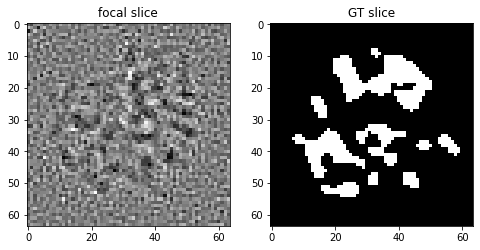

In [124]:
n_slice = 30

visusalizeIMG(n_slice, test_img, test_msk_argmax)